In [1]:
#  Import packages


from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import quad, dblquad
import time
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
import mpmath as mp
import numpy as np
mp.mp.dps = 15

# Import colours

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

hitchhiker_color=c3

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))

#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'
blue4 = '#3182bd'
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'


### Import data 

In [2]:
# Simulation parameters
u_neu = 10**-4
u_NOTCH1 = 3.4*10**-5 
u_TP53 = 1.2*10**-5
u_third = u_TP53
s_NOTCH1 = 0.11
s_TP53 = 0.11

u_neu = 6.2*10**-4

N_tau = 10**4
c = 1


n_bins=21
n_bins_above_phi=16
trimmed_fmin=10**-4
trimmed_fmax=0.4999
lmin=np.log(trimmed_fmin)
lmax=np.log(trimmed_fmax)

In [3]:
# import data : mf off

number_of_individuals_mf_on=5000
s_third = 0.05
t = 50

neutral_mutation=[]

vector_of_neutral_mutation='Data files for clonal interference/mf on third mutation 5 percent fitness/test_clonal_interference_in_oesophagus_mf_on_at_gen_ 50 .csv'

with open(vector_of_neutral_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[0])/2      # converted to 1/2 in the diploid biology world
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation.append(clone_freq)     


neutral_mutation = list(filter(lambda a: a != 0.0, neutral_mutation))

            
lneutral_mutation = np.log(np.array(neutral_mutation))  



In [4]:
# trim synonymous data (including merged calls with unmodified vaf)
phi=3*10**-3
 
list_of_syn_vaf_hitchhikers = neutral_mutation

hitchhikers_syn_VAF_above_phi_mf_on=[]
for i in list_of_syn_vaf_hitchhikers:
    if phi < i < trimmed_fmax:
        hitchhikers_syn_VAF_above_phi_mf_on.append(i)
        


In [5]:
# import data : mf on

# s_third = 0.07 
# t = 70
number_of_individuals_mf_off=5000
# number_of_individuals_mf_off=4615

neutral_mutation=[]

vector_of_neutral_mutation='Data files for clonal interference/mf off third mutation 5 percent fitness/test_clonal_interference_in_oesophagus_at_gen_ 50 .csv'

with open(vector_of_neutral_mutation) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            clone_freq= float(row[0])/2      # converted to 1/2 in the diploid biology world
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        neutral_mutation.append(clone_freq)     


neutral_mutation = list(filter(lambda a: a != 0.0, neutral_mutation))

            
lneutral_mutation = np.log(np.array(neutral_mutation))  



In [6]:
# trim synonymous data (including merged calls with unmodified vaf)
phi=3*10**-3
 
list_of_syn_vaf_hitchhikers = neutral_mutation

hitchhikers_syn_VAF_above_phi_mf_off=[]
for i in list_of_syn_vaf_hitchhikers:
    if phi < i < trimmed_fmax:
        hitchhikers_syn_VAF_above_phi_mf_off.append(i)
        


### Import functions   

In [7]:
# define plotting functions

def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err
   
# for plotting synonymous VAF
def plot_log_hist_data_for_plot_rescaled_simulation_oesophagus(study_VAFs, study_total, u_syn, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale, layer):
    # study_VAFs is a list of strings
    
    #for plotting graphs that will not span the full width of the page and so will need larger markers
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2
  
    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=layer)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)

    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
#     ax1.set_ylim(10**0.5, max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-3), np.log(0.5))
    # ax1.set_xlim(-7.6, 0)
    
    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5)]
                    
    x_major_tick_labels =  ["0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50"]

                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(0.1), np.log(0.2), np.log(0.3),\
                     np.log(0.4), np.log(0.5), np.log(0.6), \
                     np.log(0.7), np.log(0.8), np.log(0.9),\
                     np.log(1), np.log(2), np.log(3),\
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9),\
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000)]
    y_major_ticks = [c-np.log(10**0) for c in y_major_ticks]
    y_major_tick_labels = [
        "" ,"", "", "", "", "", "", "", "",  "$10^{0}$",\
        "","", "", "", "", "", "", "", "$10^{1}$",\
        "", "", "", "", "", "", "", "", "$10^{2}$",\
        "", "", "", "", "", "", "", "", "$10^{3}$",\
        "", "", "", "", "", "", "", "", "$10^{4}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
   
    return ax1  

# for plotting nonsynonymous VAF
def plot_log_hist_data_for_plot_simulation(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale, layer):
   
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=n_bins, range=(lmin, lmax))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
 

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
    print('hist without zero is', hist_without_zero)
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)

    errors = error_bars(hist_without_zero, normed_value, widths)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2


    ax1.errorbar(bin_centres_without_zero, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = color, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = color, markerfacecolor = color, label = study_name, zorder=layer)
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    ax1.set_ylim(min(log_hist_for_plot), max(log_hist_for_plot))
#     ax1.set_ylim(10**0.5, max(log_hist_for_plot))
    ax1.set_xlim(np.log(10**-4), np.log(0.5))
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')
    ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*scale, fontweight = 'medium')

    x_major_ticks =  [np.log(0.0001), np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008),np.log(0.0009),\
                      np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5)]
                  
    x_major_tick_labels =  ["0.01","","","","","","","","",\
                            "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50"]

                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3),\
                     np.log(4), 
                     np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9),\
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), 
                     np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)]
    y_major_ticks = [c-np.log(10**5) for c in y_major_ticks]
    y_major_tick_labels = [ "","", "", "",
        "", "", "", "", "", "$10^{-4}$",
        "", "", "", "", "",
        "", "", "", \
                           "$10^{-3}$","", "", "", "", "", "", "", "", "$10^{2}$","", "", "", "", "", "", "", "", "$10^{-1}$",\
                          "", "", "", "", "", "", "", "", "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1  


In [8]:
# define theory functions 

from scipy import integrate
from scipy.integrate import quad, dblquad
import scipy.special as sc
import math

     
def Predicted_neutral_VAF_log(l, N_tau, c, t): 
    return N_tau/(1-2*np.exp(l))*np.exp(-2*N_tau*np.exp(l)/(c*t))

def Predicted_drift_with_cutoff(l, N_tau, c, t):
    return N_tau/(1-2*np.exp(l))*np.exp(-2*N_tau/(c*t)*(np.exp(l)/(1-2*np.exp(l))))

def log_Predicted_neutral_VAF_log(l, N_tau, c, t): 
    return np.log(N_tau/(1-2*np.exp(l))*np.exp(-2*N_tau*np.exp(l)/(c*t)))

def Predicted_beneficial_with_cutoff(l, N_tau, u_ben, s, t):
    return N_tau/(1-2*np.exp(l))*u_ben*np.exp(-2*N_tau/((np.exp(s*t)-1)/s)*(np.exp(l)/(1-2*np.exp(l))))

In [9]:
# HH prediction 

def hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    
    N = N_tau

    expected_density=np.exp(l)*(2*N/(1-2*np.exp(l))**2)*N_tau*u_driver/s**2/(2*N*np.exp(l)/(1-2*np.exp(l)))**2*( \
                                                                                  np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*np.exp(-s*t))*np.exp(s*t)        -\
                                     np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s)*(np.exp(s*t)+ (2*N*np.exp(l)/(1-2*np.exp(l)))*s*(np.exp(s*t)-1)  ))

    return expected_density

def minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s):
    N=N_tau
    tau=1
    expected_density=np.exp(l)*N*tau*u_driver/(np.exp(l)*s*(1-2*np.exp(l)))*(-s*t*np.exp(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau)+sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau) -\
                                                   sc.expi(-(2*N*np.exp(l)/(1-2*np.exp(l)))*s*tau*np.exp(-s*t)))
    

    return expected_density

def hitchhikers_reed_model_1(l, N_tau, t, u_driver, s):
    
    relative_fitness=0.05
    
    psi = np.log((s/relative_fitness-1)*N_tau*s+1)/s

    if t>psi:
        density1 = hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver, s)\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, psi, u_driver, s)
        
        density = density1 
    else:
        density = hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s)\
        + minor_contribution_hitchhikers_alternative_theory_with_cutoff(l, N_tau, t, u_driver, s)
    
    return density


In [10]:
def squared_distance_calculation_nonsyn_cumulative_weightedbyerror_with_cutoff(params, data, study_total, c, t, N_tau, lmin, lmax, n_bins): #d = data (number of variants within a given bin), lamb (lambda) = expected number of variants in the bin from theory

    "This returns the natural log likelihood of the entire data, in specified binwidths, for a given theta and phi"
    u_driver = params[0]
    
    s = params[1]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    
    for datapoint in reversed(data):
        
        logfreq = datapoint[0] 

        data_density = datapoint[1]
        
        num_data = datapoint[4]
        
        cumulative_num_data = cumulative_num_data + num_data
        
        predicted_density=integrate.quad(lambda l: (Predicted_beneficial_with_cutoff(l, N_tau, u_driver, s, t)\
                                                    )/bin_size,\
                                     logfreq-bin_size/2, logfreq+bin_size/2)[0]
        
        predicted_cumulative_density = predicted_cumulative_density + predicted_density

        
        if data_density!= -(float('inf')):

            cumulative_data_density = cumulative_data_density + np.exp(data_density)

            square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  

            SD = math.sqrt(cumulative_num_data)/(bin_size*normed_value)
            sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)
           
            if sigma_cumulative==sigma_cumulative:
                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error
            else:
                total_square_distance = total_square_distance

        else:
            pass
     
    return total_square_distance


In [11]:
# creating lists for fitting and plotting

# synonymous variants
def rescaled_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):

    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def rescaled_cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, u_syn, n_bins_syn, lmin, lmax):

    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total*u_syn
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)

        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

# nonsynonymous variants
def VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):

    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
        
    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def cumulative_VAF_densities_list_simulation_SD(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):

    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
    print('bin_centres', len(bin_centres))
    print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []

    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)

    print('lower error:', lower_error)
    print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

# MLE based on all neutral mutations

hist without zero is [1422, 1601, 1021, 480, 202, 67, 34, 22, 6, 10, 10, 3, 3, 1]
log_hist_for_plot is [7.42034134 7.53890544 7.08905955 6.33430783 5.46878943 4.36521435
 3.68688225 3.25156418 1.9522812  2.46310682 2.46310682 1.25913402
 1.25913402 0.16052173]
errors is [(0.026876536159021747, 0.025309798949903595, 0.031796056541739226, 0.046718036291728104, 0.07295760044062849, 0.13030169298808936, 0.18813673438313216, 0.2397821029348699, 0.5246681416422598, 0.3801304080661714, 0.3801304080661714, 0.8612115025164904, 0.8612115025164904, 2.302585092994047), (0.02617305389293545, 0.024684994181061626, 0.03081614465539051, 0.044632529800705534, 0.06799481109850003, 0.1152638156235497, 0.15828377123345083, 0.19326208729997685, 0.34234658484830516, 0.27476989240834504, 0.27476989240834504, 0.455746394408326, 0.455746394408326, 0.6931471805599453)]
hist without zero is [1438, 1538, 943, 499, 210, 89, 37, 21, 14, 5, 6, 4, 4]
log_hist_for_plot is [7.43153027 7.49875988 7.00958801 6.37312782 5

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


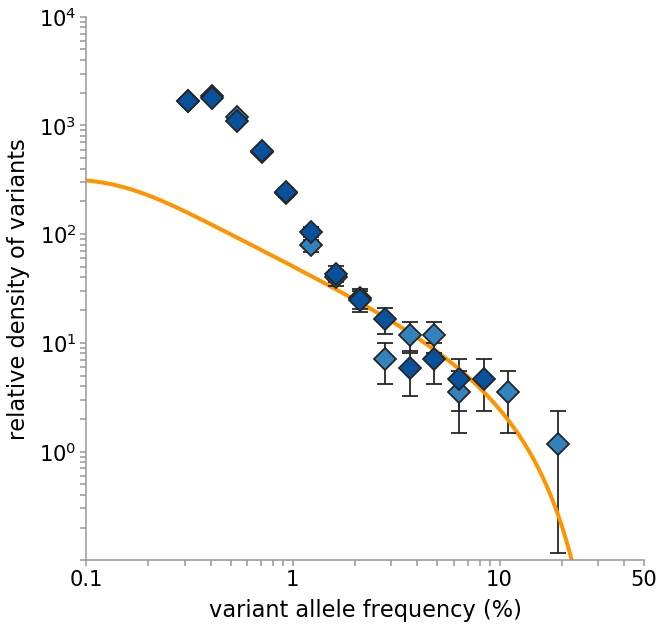

In [13]:
# Plot VAF spectra

plt.clf()
plt.close('all')
f, ax1 = plt.subplots(1,1, figsize=(10,10))
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
f.subplots_adjust(hspace=0.4)

plot_fmin=0.01/100
plot_nbins = 31


major_ticks = np.log(np.array([10**-3, 10**-2, 10**-1, 0.5]))                                         
major_tick_labels= ['0.1%', "1%", '10%', '50%' ]


fmin=np.exp(lmin)
fmax=np.exp(lmax)

linear_VAF=np.array(np.linspace(plot_fmin, fmax, 1000))
log_VAF=np.array(np.linspace(np.log(plot_fmin), np.log(fmax), 1000))

# density_neutral_drift_log=[np.log(Predicted_drift_with_cutoff(l, N_tau, c, t)) for l in log_VAF]
# ax1.plot(log_VAF, density_neutral_drift_log, zorder=0, color=grey4, lw=4, label='neutral drift')


density_hitchhiker_TP53_NOTCH1=[np.log(hitchhikers_reed_model_1(l, N_tau, t,  u_third, s_third)+\
                                       hitchhikers_reed_model_1(l, N_tau, t,  u_NOTCH1+u_TP53, s_NOTCH1)) for l in log_VAF]
ax1.plot(log_VAF, density_hitchhiker_TP53_NOTCH1, color=c3, zorder=0, lw=4, label=' ')

plot_log_hist_data_for_plot_rescaled_simulation_oesophagus(hitchhikers_syn_VAF_above_phi_mf_on, number_of_individuals_mf_on, u_neu, plot_nbins, np.log(plot_fmin), lmax, 'with clonal interference', 'D', 15, blue4, 1.5, 0)

plot_log_hist_data_for_plot_rescaled_simulation_oesophagus(hitchhikers_syn_VAF_above_phi_mf_off, number_of_individuals_mf_off, u_neu, plot_nbins, np.log(plot_fmin), lmax, 'no clonal interference', 'D', 15, blue5, 1.5, 0)

# ax1.set_ylim(np.log(10**-6), np.log(10**6))

# plt.savefig('Clonal_interference_in_healthy_oesophagus_s_5percent_at_50_gen.pdf', bbox_inches='tight')
